> ***Bienvenu au 1er Projet du parcours Data Analyst Nanodegrees de Udacity en partenariat avec ALX-T !***

# Projet : L'enquête sur l'ensemble de données des films afin de répondre à certaines questions Business

## Table de Matières
<ul>
    <li><a href="#Intro">Introduction</a></li>
    <li><a href="#Préparation">Préparation de Données</a></li>
    <li><a href="#AED">Analyse Exploratoire de Données</a></li>
    <li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id="Intro"></a>
## Introduction

> ***Cet ensemble de données contient des informations sur 10 000 films collectés à partir de `The Movie Database (TMDb)`, y compris les notes des utilisateurs et les revenus.***

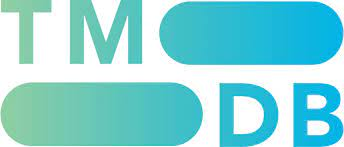

> ***Liens vers les Donnés [clicquez ici](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)***
>> **Voici Une liste non exhaustive de quelques questions que nous essayerons de répondre tout au long de ce projet**

***Il s'agit notamment de savoir :***
<ol>
    <li><a href="#films mieux notés">Quels sont les films les mieux notés ?</a></li>
    <li><a href="#films mieux notés de 2015">Quels sont les films les mieux notés de 2015 ?</a></li>
     <li><a href="#films avec plus de revenus">Combien de films ont plus de revenus ?</a></li>
    <li><a href="#évolution popularité film">La populrité des films evoulue t-elle chaque année ?</a></li>
    <li><a href="#films court métrages">Quels sont les films court métrages ?</a></li>
    <li><a href="#année sortie court métrages">Quelles sont les années avec des films de meilleurs court métrages ?</a></li>
    <li><a href="#films long métrages">Quels sont les films de long métrages ?</a></li>
    <li><a href="#année sortie long métrages">Quelles sont les années avec des films de meilleurs long métrages ?</a></li>
</ol>

In [1]:
# Importations des librairies nécessaires 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

<a id="Préparation"></a>
## Préparation de Données

> **Dans cette partie nous allons préparer nos données afin qu'elles soient prêtes pour une bonne exploration et concises pour répondre aux questions *`Business`***

### Caractéristiques Générales

In [2]:
# Chargment des données
movie_df = pd.read_csv("tmdb-movies.csv")
# Quelques lignes de notre ensemble de données
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Taille de nos données
movie_df.shape

(10866, 21)

In [4]:
# Quels types de données avons-nous ?
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Quelques informations de base sur nos données
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Le nombre de valeurs uniques dans chaque colonne
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# Afficher les colonnes
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Voici la signification de nos différentes colonnes
****************************************************************
**'id'                     : `identifiant film`**            
**'imdb_id'                : `identifiant base de données`**  
**'popularity'             : `côte de popularité`**             
**'budget'                 : `budget du film`**                 
**'revenue'                : `revenu du film`**                 
**'original_title'         : `titre original`**                 
**'cast'                   : `acteur choisis`**                
**'homepage'               : `site`**                          
**'director'               : `directeur de film`**              
**'tagline'                : `mots clé`**                      
**'keywords'               : `slogan utilisé`**                 
**'overview'               : `resumé du film`**                 
**'runtime'                : `durée du film`**                  
**'genres'                 : `type de film`**                   
**'production_companies'   : `compagnie de production`**        
**'release_date'           : `date de sortie`**                 
**'vote_count'             : `nombre de note`**                 
**'vote_average'           : `moyenne de note`**                
**'release_year'           : `année de sortie`**                
**'budget_adj'             : `budget fu film associé`**         
**'revenue_adj'            : `revenu du film associcé`**        
****************************************************************

- Colonnes non utiles à l'analyse
- Colonnes en Anglais
- Valeurs manquantes
- Incohérence des colonnes

### Netoyage de données

In [8]:
# Les 3 premières lignes de nos données
movie_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [9]:
# Supprimer les colonnes jugées non utiles pour le reste de l'analyse
movie_df.drop(["imdb_id","homepage", "tagline", "keywords", "overview", "release_date",
               "budget_adj", "revenue_adj"], axis=1, inplace=True)

# Vérification des changements apportés
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [10]:
# Afficher les 3 premières lignes
movie_df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


In [11]:
# Renomer les colonnes en Français
movie_df.rename(columns={"popularity":"popularite", "revenue":"revenu", "original_title":"titre", 
                         "cast":"acteur", "director":"directeur", "runtime":"duree", 
                         "production_companies":"compagnie_production", 
                         "vote_count":"notes", "vote_average":"note_moyenne", 
                         "release_year":"annee_sortie"}, inplace=True)

In [12]:
# La nouvelle taille de notre ensemble de données 
movie_df.shape

(10866, 13)

In [13]:
# Avons-nous des doublons dans nos colonnes ?
# Combien sont t-ils ?
movie_df.duplicated().sum()

1

In [14]:
"""
L'argument 'inplace =True' nous permet d'appliquer directement
les modifications à notre ensemble de données sans pour autant
procéder par assignation de variable
"""

# Nous allons supprimer cette valeur qui en double
# Dans notre cas nous en avons qu'un seul et unique doublon dans nos données
movie_df.drop_duplicates(inplace=True)

In [15]:
# Cette valeur en double est réelement supprimée ?
# Vérifions cela...
movie_df.duplicated().sum()

0

- Détection des valeurs manquantes

In [17]:
# Avons-nous des valeurs manquantes dans notre ensemble de données ?
# Quelles sont les colonnes ayant des valeurs manquantes et combien sont elles ?
movie_df.isna().sum()

id                         0
popularite                 0
budget                     0
revenu                     0
titre                      0
acteur                    76
directeur                 44
duree                      0
genres                    23
compagnie_production    1030
notes                      0
note_moyenne               0
annee_sortie               0
dtype: int64

- Pourcentage de valeurs manquantes

In [18]:
# Avant de prendre toute décision les données manquantes,
# Essayons de voir cela en pourcentage de façon croissante
(movie_df.isna().sum()*100/movie_df.shape[0]).sort_values(ascending=True)

id                      0.000000
popularite              0.000000
budget                  0.000000
revenu                  0.000000
titre                   0.000000
duree                   0.000000
notes                   0.000000
note_moyenne            0.000000
annee_sortie            0.000000
genres                  0.211689
directeur               0.404970
acteur                  0.699494
compagnie_production    9.479982
dtype: float64

- Suppression de valeurs manquantes

In [19]:
# Supprimer les valeurs manquantes
movie_df.dropna(inplace=True)

# Confirmer la suppression
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularite            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenu                9772 non-null   int64  
 4   titre                 9772 non-null   object 
 5   acteur                9772 non-null   object 
 6   directeur             9772 non-null   object 
 7   duree                 9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   compagnie_production  9772 non-null   object 
 10  notes                 9772 non-null   int64  
 11  note_moyenne          9772 non-null   float64
 12  annee_sortie          9772 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.0+ MB


In [20]:
# Combien de colonnes nous reste t-il au total ?
movie_df.columns.value_counts().sum()

13

In [21]:
# Afficher les premières lignes de notre ensemble de données
movie_df.head()

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [22]:
# Voyons voir les 5 dernières lignes de l'ensemble de données
movie_df.tail()

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,15,1.5,1966


In [23]:
# Les statistiques de base de toutes nos données numériques
movie_df.describe()

,id,popularite,budget,revenu,duree,notes,note_moyenne,annee_sortie
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id="AED"></a>
## Analyse Exploratoire de Données

> **Alors que nos données sont nettoyées, nous allons procéder à leur exploration en généerant quelques statistiques et en les visualisant afin de répondre aux questions que nous avons mentionnés plus haut**
>
> ***Vous êtes prêts ?😉 Alors, c'est `PARTIII !!!`😋😋😊***

In [24]:
# Les 1eres lignes de nos données
movie_df.head()

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


#### Avons-nous des valeurs aberrantes dans les colonnes "budget" et "revenu"  et duree des films?

- Détection de valeurs aberrantes (outliers)

#### Approche Statistique
- **Méthode des *`Interquartilles`***

In [25]:
# On déinfinit la fonction qui renvoi la liste de tous les indexes des outliers
def detect_outliers(df, ft):
    
    # 1er quartile
    Q1 = df[ft].quantile(0.25)
    # 3ème quartile
    Q3 = df[ft].quantile(0.75)
    
    # Calcul de l'interquartile
    IQR = Q3 - Q1
    
    # Définir les limites
    upper_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    
    # Liste de stockage des indexes de valeurs abérrantes
    indexes = df.index[(df[ft] > upper_limit) | (df[ft] < low_limit)]
    
    # Renvoyer cette liste
    return indexes

In [26]:
# Récupération de tous les indexes dans une liste
liste_index_notes = []
for feature in ["notes"]:
    liste_index_notes.extend(detect_outliers(movie_df, feature))

In [27]:
# Le nombre total des valeurs aberrantes
print(f" Nous avons au total : {len(liste_index_notes)} outliers dans nos notes")

 Nous avons au total : 1322 outliers dans nos notes


In [28]:
# Qu'en est-il dans la colonne des revenus ?
liste_indexe_revenu = []
for feature in ["revenu"]:
    liste_indexe_revenu.extend(detect_outliers(movie_df, feature))

In [29]:
print(f" Nous avons au total : {len(liste_indexe_revenu)} outliers dans nos revenus")

 Nous avons au total : 1456 outliers dans nos revenus


In [30]:
liste_index_duree = []
for feature in ["duree"]:
    liste_index_duree.extend(detect_outliers(movie_df, feature))

In [31]:
print(f" Nous avons un total de : {len(liste_index_duree)} outliers dans nos durées")

 Nous avons un total de : 524 outliers dans nos durées


#### Approche Graphique
- **Méthode des *`Boxplot`***

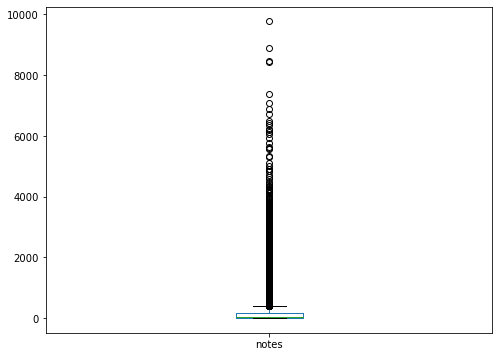

In [32]:
# Détection des outliers dans les budgets
movie_df.notes.plot(kind="box", figsize=(8, 6));

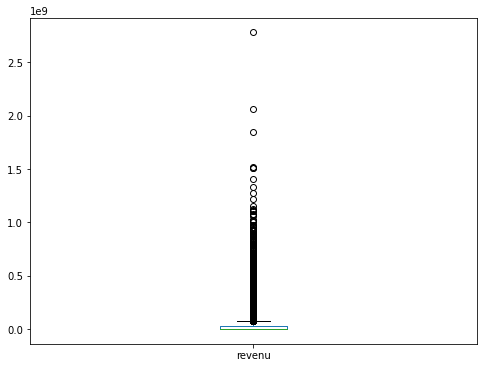

In [33]:
# Détection des valeurs aberrantes dans nos revenus
movie_df.revenu.plot(kind="box", figsize=(8, 6));

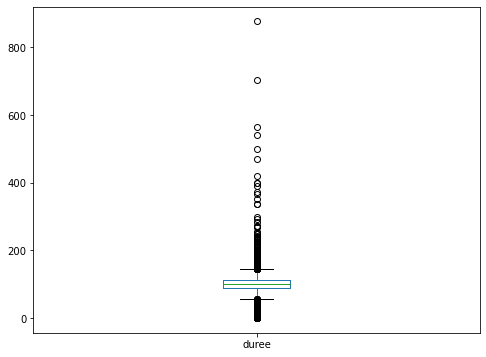

In [34]:
# Valeurs aberrantes dans la durée des films
movie_df.duree.plot(kind="box", figsize=(8, 6));

In [35]:
# Taille actuelle avant suppression de valeurs aberrantes
movie_df.shape

(9772, 13)

#### Suppression des valeurs aberrantes nos durées

In [36]:
# Définir une fonction qui supprime les outliers
def remove(df, indexes):
    
    # Trier la liste des indexes
    indexes = sorted(set(indexes))
    
    # Suppression
    df = df.drop(indexes)
    
    # Renvoyer un Data set sans outliers
    return df

In [37]:
# Suppression des outliers afin de travailler avec un Data set sans outliers
movie_cleaned = remove(movie_df, liste_index_duree)

In [38]:
# La taille suppresion de valeurs aberrantes dans la durée des films
movie_cleaned.shape

(9248, 13)

In [39]:
# Avant de continuer, faisant une copie de notre ensemble de données nettoyée
movie_df = movie_cleaned.copy()

#### Distribution de quelques variables

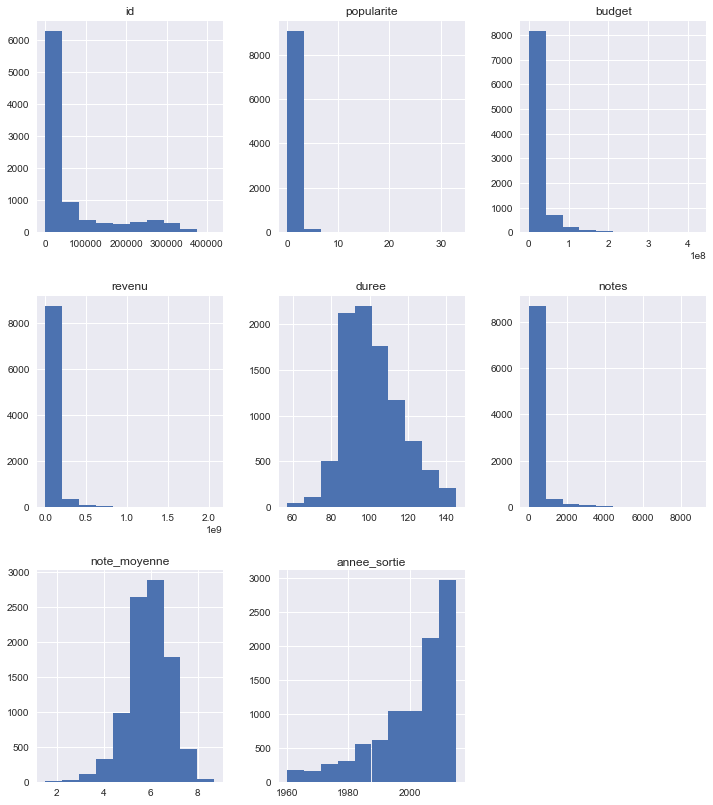

In [40]:
# Commençons tout d'abord par visualiser toutes les données numériques dans un histogramme
# Apperçu de données quantitatives

# Utilisons le style de "seaborn"
plt.style.use("seaborn")
movie_df.hist(figsize=(12, 14));

- Définition de la fonction traçant les histogrammes

In [79]:
# Fonction de traçage des diagrammes en histogramme
def trace_hist(df, ft):
    df[ft].plot(kind="hist", figsize=(8, 6))

- Appels à la fonction ***`trace_hist()`*** des histogrammes

- La distribution des `Notes Moyennes`

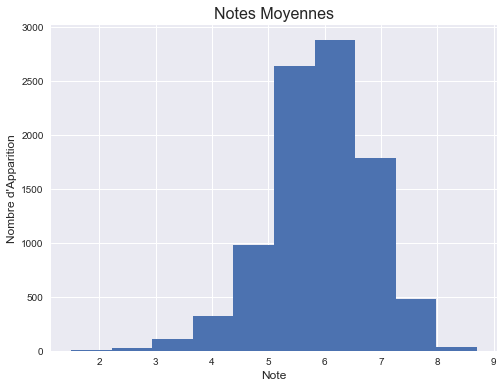

In [80]:
# Appel à la fonction sur la colonne des notes moyennes
trace_hist(movie_df, "note_moyenne")
# Titre de la figure
plt.title("Notes Moyennes", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Note", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre d'Apparition", fontsize=12);

- La distribution des `Années de Sortie` des films

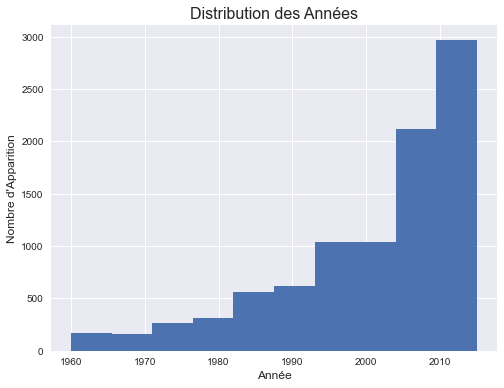

In [81]:
# Appel à la fonction sur la colonne de l'année de sortie du film
trace_hist(movie_df, "annee_sortie")
# Titre de la figure
plt.title("Distribution des Années", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Année", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre d'Apparition", fontsize=12);

- La distribution du `Budget`

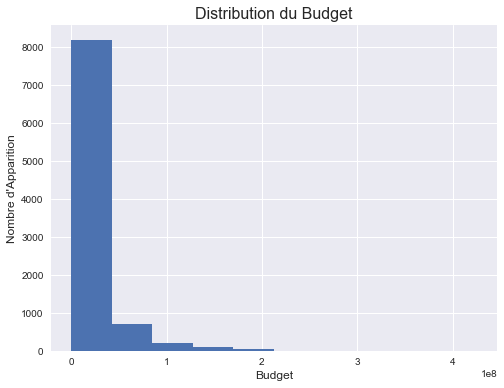

In [82]:
# Appel à la fonction sur la colonne de budget
trace_hist(movie_df, "budget")
# Titre de la figure
plt.title("Distribution du Budget", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Budget", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre d'Apparition", fontsize=12);

- La distribution des `revenus`

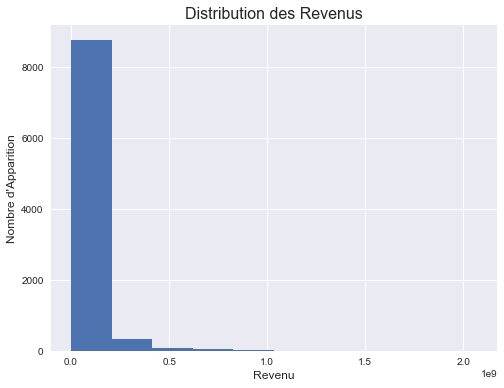

In [83]:
# Appel à la fonction sur la colonne des revenus
trace_hist(movie_df, "revenu")
# Titre de la figure
plt.title("Distribution des Revenus", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Revenu", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre d'Apparition", fontsize=12);

- La distribution des `durées` des films

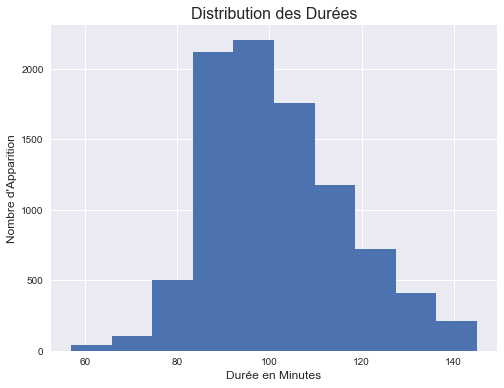

In [84]:
# Appel à la fonction sur la colonne des durées des films
trace_hist(movie_df, "duree")
# Titre de la figure
plt.title("Distribution des Durées", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Durée en Minutes", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre d'Apparition", fontsize=12);

### Différentes Corrélations de quelques variables

In [85]:
# Les 1eres lignes de notre ensemble de données
movie_df.head()

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


- **Relation entre les *`Notes`* et les différentes caractéristiques**

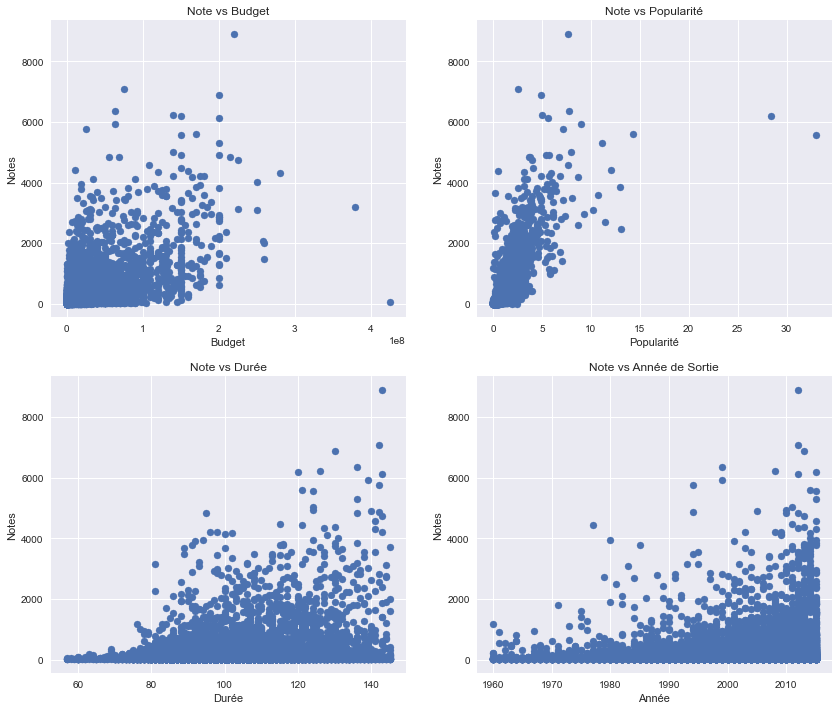

In [108]:
# Feuille de visualisation et les axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Relation Note vs le Budget
ax1.scatter(movie_df.budget, movie_df.notes)
# Titre et etiquettes sur les deux axes (x et y)
ax1.set(title="Note vs Budget", xlabel="Budget", ylabel="Notes")
# Relation Note vs  Popularité
ax2.scatter(movie_df.popularite, movie_df.notes)
# Titre et etiquettes sur les deux axes (x et y)
ax2.set(title="Note vs Popularité", xlabel="Popularité", ylabel="Notes")
# Relation Note vs Durée
ax3.scatter(movie_df.duree, movie_df.notes)
# Titre et etiquettes sur les deux axes (x et y)
ax3.set(title="Note vs Durée", xlabel="Durée", ylabel="Notes")
# Relation Note vs Année de Réalisation
ax4.scatter(movie_df.annee_sortie, movie_df.notes)
# Titre et etiquettes sur les deux axes (x et y)
ax4.set(title="Note vs Année de Sortie", xlabel="Année", ylabel="Notes");

- **Relation entre le *`Revenu`* et les différentes caractéristiques**

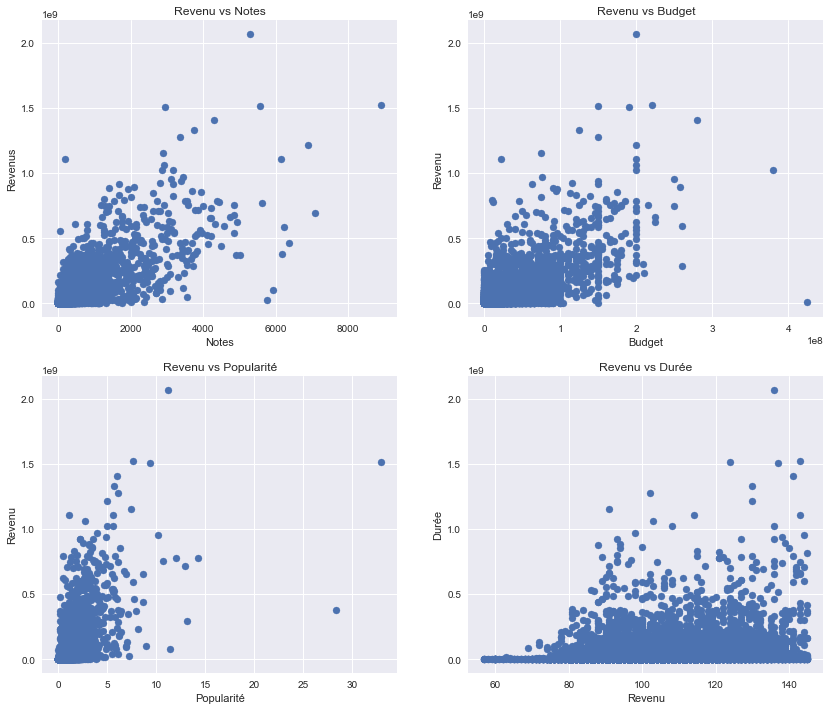

In [112]:
# Création de la feuille de visualisation et des axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Visualiser Revenu vs Nombre de Votes
ax1.scatter(movie_df.notes, movie_df.revenu)
# Titre et etiquettes sur les deux axes (x et y)
ax1.set(title="Revenu vs Notes", xlabel="Notes", ylabel="Revenus")
# Plotting Revenu vs  Budget
ax2.scatter(movie_df.budget, movie_df.revenu)
# Titre et etiquettes sur les deux axes (x et y)
ax2.set(title="Revenu vs Budget", xlabel="Budget", ylabel="Revenu")
# Plotting Revenu vs Popularité
ax3.scatter(movie_df.popularite, movie_df.revenu)
# Titre et etiquettes sur les deux axes (x et y)
ax3.set(title="Revenu vs Popularité", xlabel="Popularité", ylabel="Revenu")
# Plotting Revenu vs Durée
ax4.scatter(movie_df.duree, movie_df.revenu)
# Titre et etiquettes sur les deux axes (x et y)
ax4.set(title="Revenu vs Durée", xlabel="Revenu", ylabel="Durée");

- **Relations entre les différentes caractéristiques**

In [113]:
# Avant tout, voyons à nouveau les différentes lignes de notre ensemble de données
movie_df.head()

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


- Fonction de description de différentes caractéristiques

In [117]:
# Définition de la fontion
def correlation(df, ft_1, ft_2):
    df.plot(x=ft_1, y=ft_2, kind="scatter", figsize=(8, 6))

- **Différents appels à la fonction** ***`correlation()`***

- Corrélation entre la *`durée`* durée des films et leur *`popularité`*

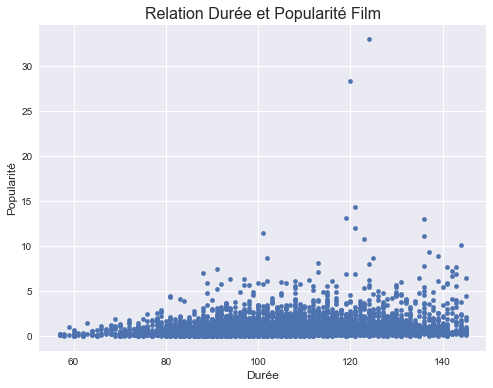

In [119]:
# Appel à la fonction pour visualiser la relation entre la durée et la popularité du film
correlation(movie_df, "duree", "popularite")
# Titre de la figure
plt.title("Relation Durée et Popularité Film", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Durée", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Popularité", fontsize=12);

- Corrélation entre le *`budget`* du film et sa *`popularité`*

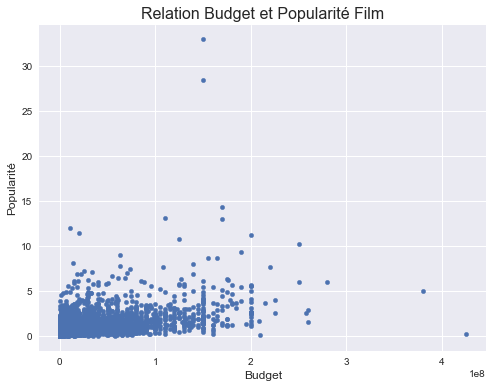

In [120]:
# Appel à la fonction pour visualiser la relation entre le budget du film et sa popularité
correlation(movie_df, "budget", "popularite")
# Titre de la figure
plt.title("Relation Budget et Popularité Film", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Budget", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Popularité", fontsize=12);

- Corrélation entre l'*`année`* de sortie du film et son *`budget`*

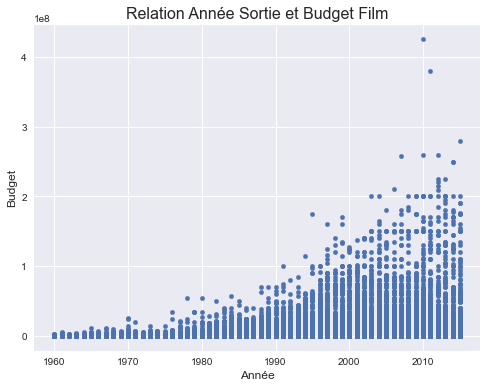

In [121]:
# Appel à la fonction pour visualiser la relation entre l'année de sortie et le budget du film
correlation(movie_df, "annee_sortie", "budget")
# Titre de la figure
plt.title("Relation Année Sortie et Budget Film", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Année", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Budget", fontsize=12);

In [122]:
# Les 3 1eres lignes de nos données
movie_df.head(3)

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


<a id="films mieux notés"></a>
### Les films les mieux notés

In [123]:
movie_df.notes.value_counts()

10      360
11      334
12      299
13      273
14      229
       ... 
392       1
2100      1
794       1
786       1
2031      1
Name: notes, Length: 1220, dtype: int64

- **Fonction pour tracer les digrammes en** ***`bâton`***

In [130]:
# Définition de la fonction
def trace_bar(df, ft):
    # df = DataFrame et ft = Feature
    df[ft].value_counts().plot(kind="bar", figsize=(10, 8))

In [127]:
'''
Pour répondre à cette question, nous allons considérer un film comme bien noté
si la note qu'il a obtenu est largement superieure à la médiane
'''
# Ensemble de données ayant les notes superieur à la médiane
notes_df = movie_df.query('notes >= notes.median()')

- ***Faire appel à la fonction pour tracer les diagrammes en*** *`bâtons`*

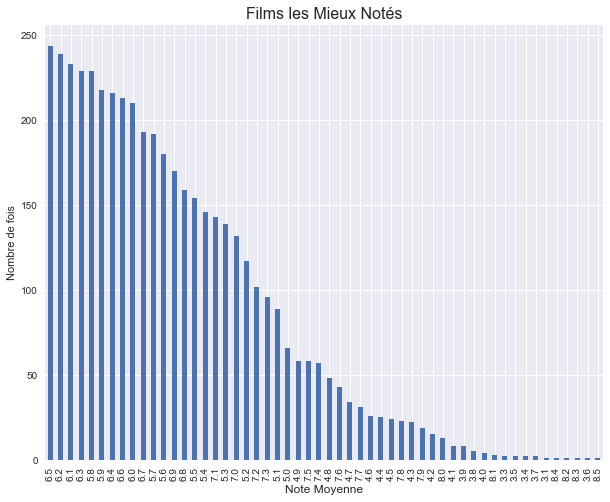

In [131]:
# Appel à la fonction
trace_bar(notes_df, "note_moyenne")
# Titre de la figure
plt.title("Films les Mieux Notés", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Note Moyenne", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre de fois");

<a id="films mieux notés de 2015"></a>
### Les films les mieux notés de 2015 

In [132]:
# Années de réalisation des films
movie_df.annee_sortie.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [133]:
# Capturer la dernière année de sortie de film qui est en l'occurence 2015
annee_2015 = movie_df.query('annee_sortie == 2015')

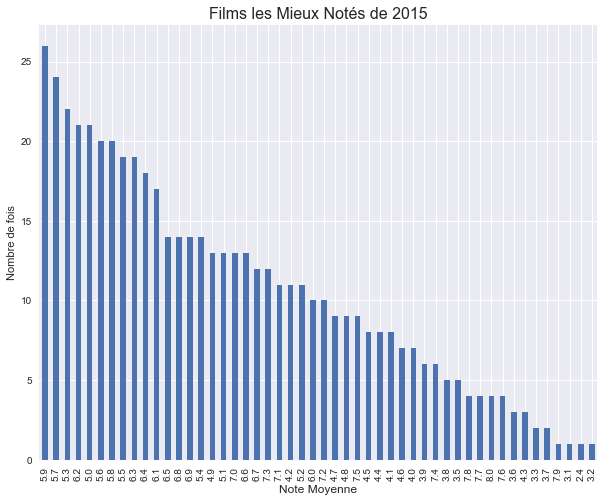

In [134]:
# Appel à la fonction
trace_bar(annee_2015, "note_moyenne")
# Titre de la figure
plt.title("Films les Mieux Notés de 2015", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Note Moyenne", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre de fois");

<a id="films avec plus de revenus"></a>
### Le nombre de films qui ont plus de revenus

In [135]:
# Ajoutons une colonne de revenu moyen
# Cette colonne servira pour savoir les films ayant plus de revenu
movie_df["revenu_moyen"] = movie_df.revenu.mean()

In [136]:
# Vérification des modifications apportées

# Affichons les 3 premières lignes des données
movie_df.head(3)

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie,revenu_moyen
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,4.186474e+07
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,4.186474e+07
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,4.186474e+07


In [137]:
# Création de l'ensemble de données avec des revenu largement superieur à la médiane
revenu_df = movie_df.query('revenu >= revenu_moyen')

In [138]:
# Voyons les 
revenu_df.revenu.sort_values(ascending=False)

3       2068178225
4361    1519557910
0       1513528810
4       1506249360
14      1405035767
           ...    
8615      42000000
2900      42000000
5251      41954997
3131      41939392
9368      41895491
Name: revenu, Length: 1965, dtype: int64

In [139]:
# Confirmons la valeur maximale des revenus
print(f"Le revenu le plus élevé est de {movie_df.revenu.max()} $")

Le revenu le plus élevé est de 2068178225 $


In [140]:
# Combien de films ont un revenu supeieur à la moyenne ?
print(f" Nous avons {revenu_df.revenu.value_counts().sum()} films avec un revenu superieur à la moyenne")

 Nous avons 1965 films avec un revenu superieur à la moyenne


<a id="évolution popularité film"></a>
### L'évoulution de la populrité des films chaque année

In [141]:
# Les popularités les plus apparues
movie_df.popularite.value_counts().sort_values(ascending=False)

0.292536    2
0.214587    2
0.430191    2
0.078482    2
0.340804    2
           ..
0.092150    1
1.405720    1
0.264922    1
0.097126    1
0.195415    1
Name: popularite, Length: 9214, dtype: int64

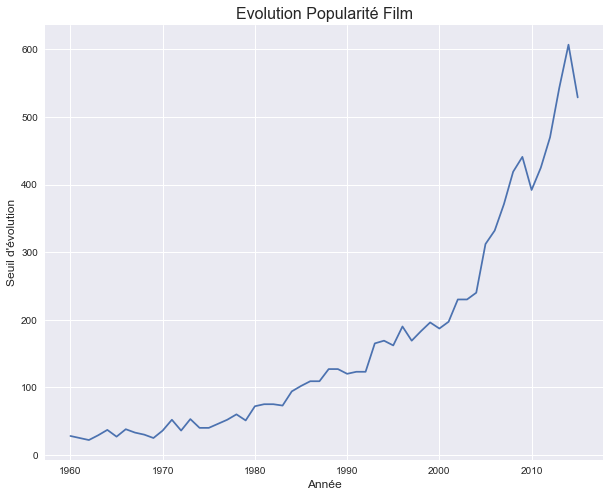

In [143]:
# Définir une feuille de visualisation
plt.figure(figsize=(10, 8))
# Tracer la courbe d'évolution de la popularité de chaque année
plt.plot(movie_df.groupby("annee_sortie")["popularite"].count())
# Titre de la figure
plt.title("Evolution Popularité Film", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Année", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Seuil d'évolution", fontsize=12);

<a id="films court métrages"></a>
### Les films court métrages

In [144]:
movie_df.head(3)

,id,popularite,budget,revenu,titre,acteur,directeur,duree,genres,compagnie_production,notes,note_moyenne,annee_sortie,revenu_moyen
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,4.186474e+07
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,4.186474e+07
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,4.186474e+07


In [145]:
# Dataframe des films de moins de 60 min considérées comme courts métrages
court_df = movie_df.query('duree < 60')

In [146]:
# Le temps considérés comme étant court métrage
court_df.duree.unique()

array([57, 59, 58], dtype=int64)

- Faire appel à la fonction *`trace_bar()`* pour visualiser les films court métrages

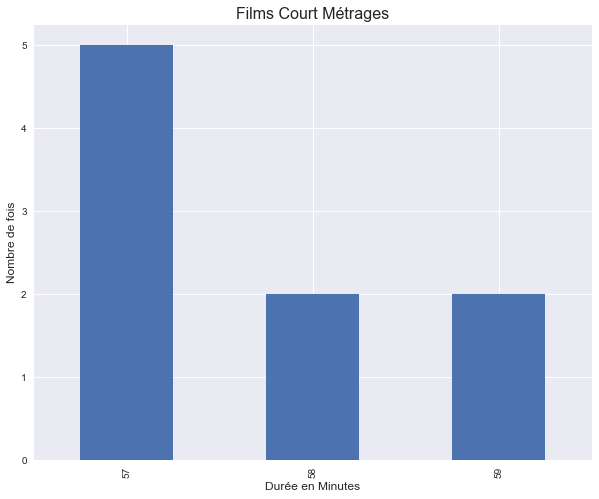

In [148]:
# Appel à la fonction
trace_bar(court_df, "duree")
# Titre de la figure
plt.title("Films Court Métrages", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Durée en Minutes", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Nombre de fois", fontsize=12);

<a id="année sortie court métrages"></a>
### Les années ayant réalisées les films de plus court métrages

In [149]:
# Le plus court métrage
print(f"Le plus court métrage est de : {court_df.duree.min()} minutes")

Le plus court métrage est de : 57 minutes


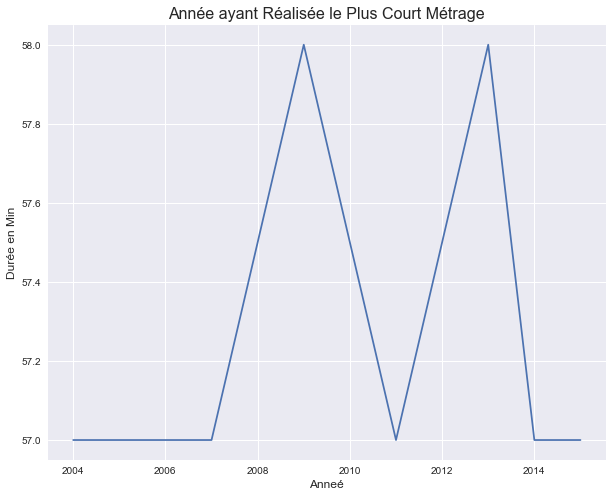

In [150]:
# Feuille de visualisation
plt.figure(figsize=(10, 8))
# Tracer la courbe évolutive des années selon le métrage
plt.plot(court_df.groupby("annee_sortie")["duree"].min())
# Titre de la figure
plt.title("Année ayant Réalisée le Plus Court Métrage", fontsize=16)
# Etiquette sur l'axe x
plt.xlabel("Anneé", fontsize=12)
# Etiquette sur l'axe y
plt.ylabel("Durée en Min", fontsize=12);

<a id="films long métrages"></a>
### Les films de long métrages

In [151]:
# Les films de plus de 60 min considérées comme long métrages
long_df = movie_df.query('duree >= 60')

In [152]:
# Le temps considéré comme étant long métrage
long_df.duree.unique()

array([124, 120, 119, 136, 137, 125, 141,  91,  94, 108, 105, 109, 115,
       112, 130, 123, 114, 131, 128, 132, 103, 117, 101,  93, 111, 106,
       122, 116,  97,  92, 118, 121, 100, 133,  96, 102,  95,  88,  99,
        89, 107, 104,  98, 113,  85,  90,  84,  82,  87,  83,  67,  86,
        74, 134, 110,  72,  80, 127,  76, 135,  75,  81, 129,  78, 138,
        62,  77,  70,  73,  79,  60,  65,  64, 144, 145, 139, 142,  71,
        66, 143, 140,  61,  69, 126,  63,  68], dtype=int64)

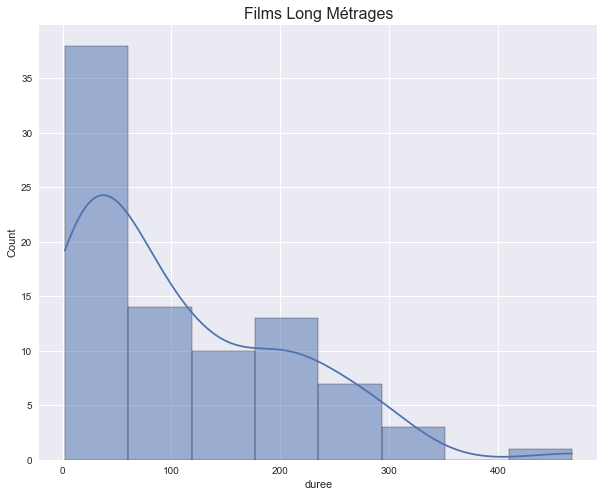

In [153]:
# Feuille de travail
plt.figure( figsize=(10, 8))
# Tracer le digramme en bâtons
sns.histplot(long_df.duree.value_counts(),kde=True, cbar=True)
# Le titre de la figure
plt.title("Films Long Métrages", fontsize=16);

<a id="année sortie long métrages"></a>
### Les années ayant réalisées des films de plus long métrages

In [154]:
# Quel est le plus long métrage ?
print(f"Le plus long métrage est de : {long_df.duree.max()}")

Le plus long métrage est de : 145


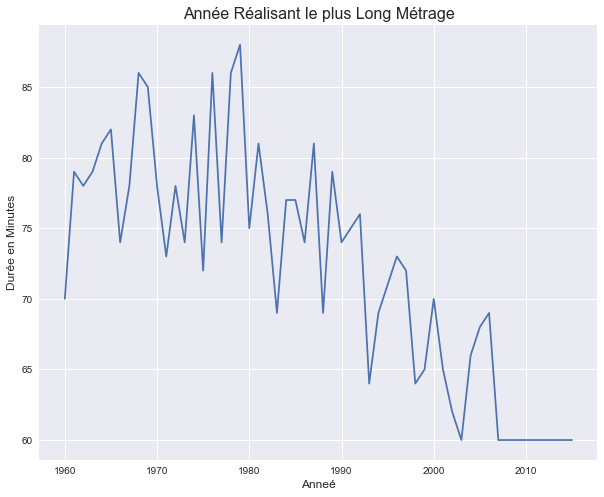

In [155]:
# Feuille de travail
plt.figure(figsize=(10, 8))
# Tracer l'évolution du long métrage chaque année
plt.plot(long_df.groupby("annee_sortie")["duree"].min())
# Le titre de la figure
plt.title("Année Réalisant le plus Long Métrage", fontsize=16)
# Etique sur l'axe x
plt.xlabel("Anneé", fontsize=12)
# Etique sur l'axe y
plt.ylabel("Durée en Minutes", fontsize=12);

>**Liste des sites Web, livres, forums, article de blog, dépôts Github : *`S.O`***

<a id="AED"></a>
## Conclusions

> **Dans cette dernière partie, nous allons essayer de tirer conclusions nécessaires en se bassant sur l'exploration des différentes colonnes et aussi sur les quelques questions répondues ci-dessus**

> ***D'après les pourcentages des valeurs manquantes on peut observer le pourcentage le plus élevé est à peine de `9%` se trouvant dans la colonne `compagnie_production`. Ce pourcentage n'est pas assez élevé par rapport à notre ensemble de données et donc nous avons procédé à l'élimination de ces valeurs manquantes en effet, cela n'a pas un impacte assez conséquente sur les données restantes.***

>***On observer un grand nombre de valeurs aberrantes et celles qui ont beaucoup marquées notre attention étaient celles de la durée des films, il fallu nettoyer ces valeurs aberrantes dites `outliers` dans la colonne `duree` et d'ailleurs, c'est ce qui a permi de répondre aux questions sur les films de court et long métrages. L'approche statistique pour détecter ces `outliers` est d'une très grande importance car, elle nous a permi de les supprimer par la suite***

>***On note une corrélation positive entre la popularité et les notes des films et aussi entre le  budgets et les revenus des films***

>***On note que les films les mieux notés en général ont une note moyenne de `6.5` alors que ceux de l'année `2015` spéficiquement ont une note moyenne de `5.9`***

>***On observe que le revenu le plus élevé des films est de `2068178225`***

>***D'après la courbe de popularité des films, on peut observer un engouement drastique que le public a pour les films de `1960` à `2015`***

>***Le film le plus court métrage a une durée de `57 minutes` et on observe également que ce métrage a été réalisé pour la première fois en consécutivement en `2004 - 2005 - 2006 - 2007` puis a été encore réalisé en `2011` et par la suite en `2014` et `2015`***

>***Nous pouvons également voir que le film le plus long métrage dure `145 minutes` et a été réalisé approximativement en `1979`***

>***`Limitations`***
>>Au cours de cette analyse, nous avons constaté que les valeurs aberrantes sont un véritable obstacle pour le reste de l'analyse c'est le cas par exemple de la durée des films, en effet, il est difficile de savoir les films de plus court ou long métrages sans pour autant éliminer ces valeurs aberrantes ***`(outliers)`***. 
Et en ce qui concerne les deux autres colonnes `revenu` et `budget` dans lesquelles nous avons aussi identifier une grande quantité de valeurs aberrantes, qui, d'ailleurs, contribuent à la mauvaise visualisation graphique de celles-ci `(variables)`.